In [2]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import numpy as np
import cv2


In [3]:
path_dataset= r"./dataset-leaf"
dir = path_dataset
datadir = path_dataset


In [4]:
dir

'./dataset-leaf'

In [5]:
datadir

'./dataset-leaf'

In [6]:
a=[len(os.listdir(os.path.join(dir,os.listdir(dir)[x]))) for x in range(0,9)]
print(a)
sum(a)

[12, 12, 12, 12, 12, 12, 12, 12, 12]


108

C:\Users\ACER\AppData\Local\Temp\ipykernel_19136\3100025888.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='class', y='count', data=DF, palette='pastel')
C:\Users\ACER\AppData\Local\Temp\ipykernel_19136\3100025888.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


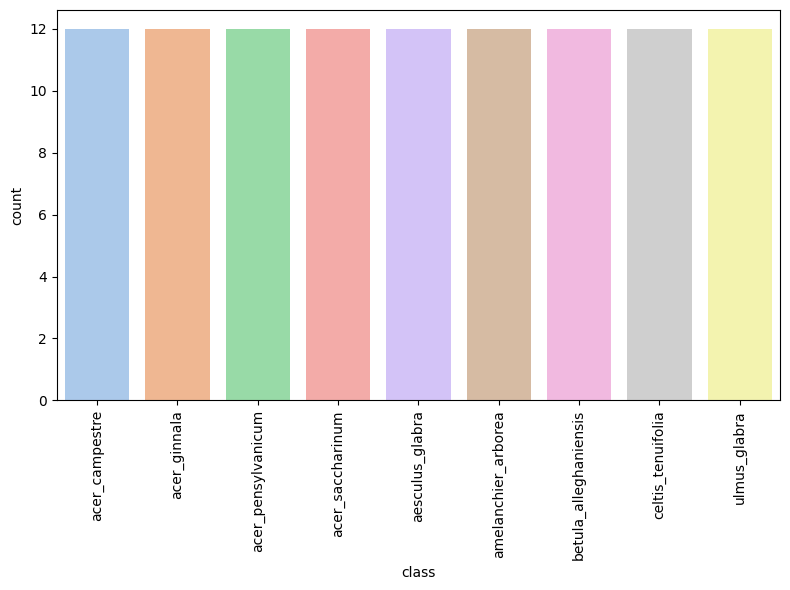

In [7]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame với 2 cột, 'class' và 'count'
DF = pd.DataFrame(columns=['class','count'])

# Cột 'class' được điền với 9 thư mục con đầu tiên trong một thư mục được chỉ định.
# os.listdir là một hàm Python trả về danh sách các tệp và thư mục con trong một thư mục được chỉ định.
DF['class'] = pd.Series([os.listdir(dir)[x] for x in range(0,9)])

# Cột 'count' được điền với số lượng tệp trong mỗi thư mục con bằng cách sử dụng khả năng hiểu danh sách.
# os.path.join được sử dụng để tạo đường dẫn đầy đủ tới từng thư mục con
# len(os.listdir) trả về số lượng tệp trong thư mục con đó.
DF['count'] = pd.Series([len(os.listdir(os.path.join(dir, os.listdir(dir)[x]))) for x in range(0,9)])

# Tạo ra một hình mới với kích thước 8 inch x 6 inch.
plt.figure(figsize=(8,6))

# Tạo biểu đồ thanh bằng cách sử dụng Seaborn với 'class' trên trục x và cột 'count' trên trục y
# Chúng ta cũng có thể chỉ định màu sắc cho biểu đồ bằng cách sử dụng tham số palette.
g = sns.barplot(x='class', y='count', data=DF, palette='pastel')

# Xoay nhãn trục x 90 độ để dễ đọc hơn.
g.set_xticklabels(g.get_xticklabels(), rotation=90)

# Tự động điều chỉnh khoảng cách giữa các ô con để tránh văn bản hoặc nhãn chồng chéo.
plt.tight_layout()

# Hiển thị biểu đồ
plt.show()

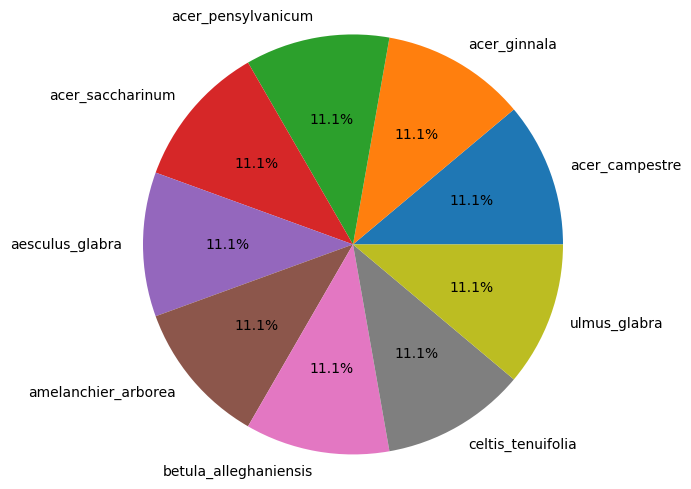

In [8]:
## Đoạn mã này tạo ra một biểu đồ hình tròn đếm số lượng hình ảnh trong mỗi class cho dữ liệu đào tạo
plt.figure(figsize=(8,6))
plt.tight_layout()
# tạo biểu đồ hình tròn bằng Matplotlib với cột 'count' làm dữ liệu, cột 'class' làm nhãn
# chuỗi định dạng %1.1f%% để hiển thị phần trăm của mỗi lát cắt.
plt.pie(DF['count'],
        labels=DF['class'],
        autopct='%1.1f%%')
# Định dạng biểu đồ hình tròn.
plt.axis('equal')
# đặt tiêu đề
# plt.title('Proportion of each observed category')
plt.show()

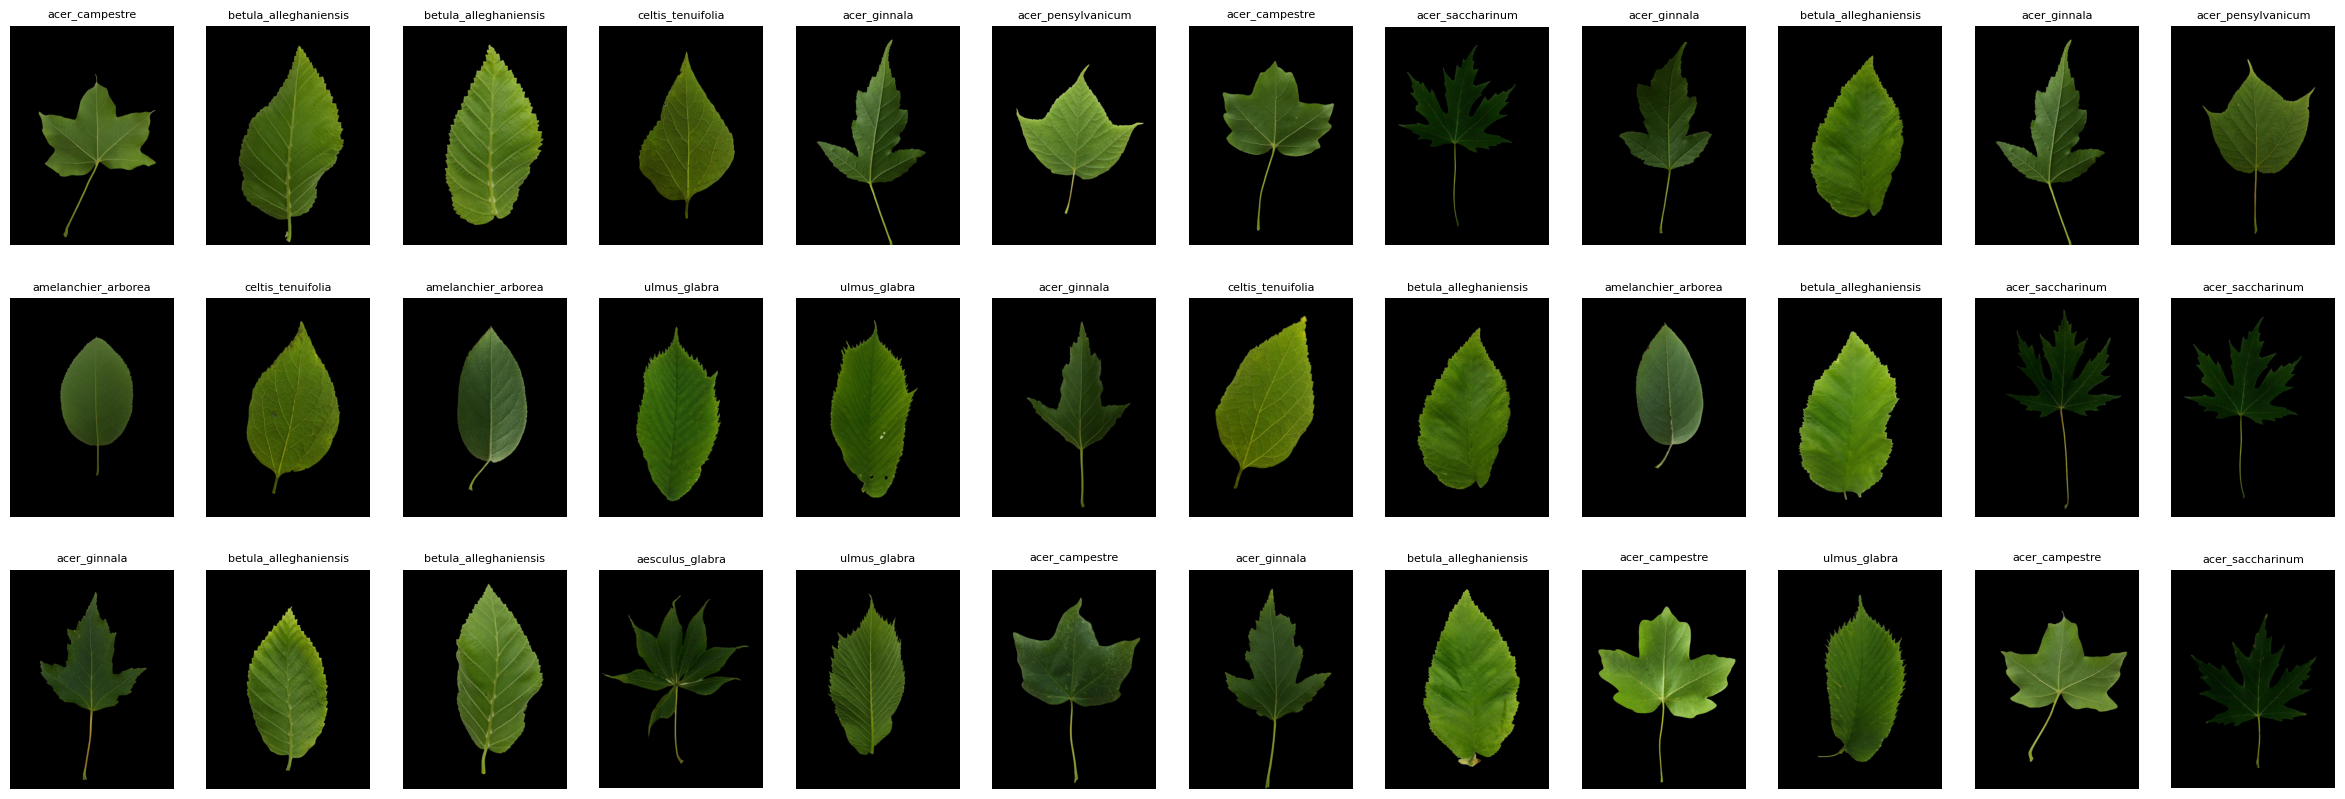

In [12]:
W = 3
H = 12

# Tạo một đối tượng lưới hình ảnh với kích thước là W hàng và H cột
# với kích thước của lưới là (17,17) inches, và gán cho biến fig và axes.
fig, axes = plt.subplots(W, H, figsize=(30, 10))

# Chuyển đổi đối tượng lưới hình ảnh từ dạng hai chiều sang một chiều duy nhất để dễ dàng truy cập và xử lý.
axes = axes.ravel()

# Vòng lặp để duyệt qua từng phần tử trong lưới hình ảnh
for i in np.arange(0, W * H):
    # Chọn ngẫu nhiên một nhãn từ danh sách các thư mục trong dir, đại diện cho tên lớp của hình ảnh.
    label = random.choice(os.listdir(dir))
    # print(label)
    # Tạo đường dẫn đầy đủ đến thư mục của lớp hình ảnh đã chọn.
    class_dir = os.path.join(dir, label)
    # Chọn ngẫu nhiên một hình ảnh từ danh sách các tập tin trong thư mục lớp đã chọn.
    image = random.choice(os.listdir(class_dir))
    # print(image)
    # Đọc hình ảnh từ đường dẫn đầy đủ của hình ảnh đã chọn bằng OpenCV
    img = cv2.imread(os.path.join(class_dir, image))
    # Chuyển đổi hình ảnh từ BGR sang RGB (vì OpenCV đọc hình ảnh trong định dạng BGR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Hiển thị hình ảnh lên ô hình ảnh thứ i trong lưới.
    axes[i].imshow(img)
    # Đặt tiêu đề cho hình ảnh là nhãn của lớp hình ảnh đã chọn, với cỡ chữ là 8.
    axes[i].set_title(label, fontsize=8)
    #  Tắt trục đồ thị để loại bỏ các dấu nhắc nhở trục trong hình ảnh.
    axes[i].axis('off')
    # break
plt.show()

# GÁN NHÃN CHO CÁC LOẠI LÁ

In [13]:
Categories = []
# Duyệt qua danh sách các thư mục (lớp) trong datadir (đường dẫn đến dữ liệu hình ảnh), và thêm tên của mỗi thư mục vào danh sách Categories.
for cat in os.listdir(datadir):
    Categories.append(cat)
Categories

['acer_campestre',
 'acer_ginnala',
 'acer_pensylvanicum',
 'acer_saccharinum',
 'aesculus_glabra',
 'amelanchier_arborea',
 'betula_alleghaniensis',
 'celtis_tenuifolia',
 'ulmus_glabra']

In [14]:
dict_cat={}
count=0
for cat in Categories:

  dict_cat[str(count)]=str(cat)
  count+=1
print(dict_cat)

{'0': 'acer_campestre', '1': 'acer_ginnala', '2': 'acer_pensylvanicum', '3': 'acer_saccharinum', '4': 'aesculus_glabra', '5': 'amelanchier_arborea', '6': 'betula_alleghaniensis', '7': 'celtis_tenuifolia', '8': 'ulmus_glabra'}


# TRANSFER ALL DATA TO RGB

In [15]:
leaf_data = []
img_size = (496, 496) #continue
count=0
for cat in Categories:
    path = os.path.join(datadir, cat)
    class_num = Categories.index(cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)

        img_array = cv2.resize(img_array, img_size) #continue
        leaf_data.append([ class_num,img_array])
        print(count, end=" ")
        count=count+1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 

In [17]:
leaf_data[0]
for i in leaf_data[0]:
    print(i)

0
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [18]:
X = []
y = []
for img, label in leaf_data:
    y.append(img)
    X.append(label)
# print(X) ma trận
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]


In [19]:
#save Leaf data npy.
leaf_data_object = np.array(leaf_data, dtype=object)
np.save("./leaf_data.npy",leaf_data_object)

In [20]:
leaf_data_object

array([[0, array([[[0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   ...,
                   [0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0]],

                  [[0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   ...,
                   [0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0]],

                  [[0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   ...,
                   [0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0]],

                  ...,

                  [[0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   ...,
                   [0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0]],

                  [[0, 0, 0],
                   [0, 0, 0],
                   [0, 0, 0],
                   ...,
                   [0, 0, 0],
        

# HÀM TRÍCH ĐẶC TRƯNG MÀU Histogram


In [22]:
def rgb_to_hsv(pixel):
    r , g, b = pixel
    r , g ,b = b / 255.0, g / 255.0, r / 255.0

    v = max(r,g,b)
    delta = v - min(r,g,b)

    if delta == 0:
        h = 0
        s = 0
    else:
        s = delta / v
        if r == v:
            h = (g - b) / delta
        elif g == v:
            h = 2 + (b - r) / delta
        else:
            h = 4 + (r - g) / delta
        h = (h / 6) % 1.0

    return [int(h*180), int(s*255), int(v*255)]

def covert_image_rgb_to_hsv(img):
  hsv_image=[]
  for i in img:
    hsv_image2=[]
    for j in i:
      new_color=rgb_to_hsv(j)
      hsv_image2.append((new_color))
    hsv_image.append(hsv_image2)
  hsv_image=np.array(hsv_image)
  return hsv_image

def my_calcHist(image, channels, histSize, ranges):
    # Khởi tạo histogram với tất cả giá trị bằng 0
    hist = np.zeros(histSize, dtype=np.int64)
    # Lặp qua tất cả các pixel trong ảnh
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Lấy giá trị của kênh màu được chỉ định
            bin_vals = [image[i, j, c] for c in channels]
            # Tính chỉ số của bin
            bin_idxs = [(bin_vals[c] - ranges[c][0]) * histSize[c] // (ranges[c][1] - ranges[c][0]) for c in range(len(channels))]
            # Tăng giá trị của bin tương ứng lên 1
            hist[tuple(bin_idxs)] += 1
    return hist

# TRÍCH XUẤT RGB

In [23]:
from tqdm import tqdm
data_RGB =[]
for i in range(len(leaf_data)):
  # Đọc ảnh và chuyển đổi sang không gian màu HSV
  img = leaf_data[i][1]
  bins = [8, 8,8]
  ranges = [[0, 256], [0, 256], [0, 256]]
  # img_hsv=covert_image_rgb_to_hsv(img)
  hist_my = my_calcHist(img, [0, 1, 2], bins, ranges)
  embedding = hist_my.flatten()
  embedding[0]=0
  data_RGB.append([leaf_data[i][0],embedding])
  print(i,end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 

In [24]:
len(embedding)

512

In [25]:
data_RGB_object = np.array(data_RGB, dtype=object)
np.save('./rgb.npy',data_RGB_object)

# TRÍCH XUẤT HSV

In [26]:
data_HSV=[]
for i in range(len(leaf_data)) :
  # Đọc ảnh và chuyển đổi sang không gian màu HSV
  img = leaf_data[i][1]
  bins = [8,12,3]
  ranges = [[0, 180], [0, 256], [0, 256]]
  img_hsv=covert_image_rgb_to_hsv(img)
  hist_my = my_calcHist(img_hsv, [0, 1, 2], bins, ranges)
  # print(hist_my.shape)
  embedding = hist_my.flatten()
  embedding[0]=0
  data_HSV.append([leaf_data[i][0],embedding])
  print(i,end=' ')


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 

In [27]:
data_HSV_object = np.array(data_HSV, dtype=object)
np.save("./hsv.npy", data_HSV_object)

# TRÍCH XUẤT ĐẶC TRƯNG HÌNH DẠNG HOG

In [28]:
from skimage import exposure
from skimage import feature
import cv2
def convert_image_rgb_to_gray(img_rgb, resize="no"):
  h, w, _ = img_rgb.shape
  # Create a new grayscale image with the same height and width as the RGB image
  img_gray = np.zeros((h, w), dtype=np.uint32)

  # Convert each pixel from RGB to grayscale using the formula Y = 0.299R + 0.587G + 0.114B
  for i in range(h):
      for j in range(w):
          r, g, b = img_rgb[i, j]
          gray_value = int(0.299*r + 0.587*g + 0.114*b)
          img_gray[i, j] = gray_value
  # print(gray_image.shape())
  if resize!="no":
     img_gray = cv2.resize(src=img_gray, dsize=(496, 496))
  return np.array(img_gray)
def hog_feature(gray_img):# default gray_image
  # 1. Khai báo các tham số
  (hog_feats, hogImage) = feature.hog(gray_img, orientations=9, pixels_per_cell=(8 , 8),
    cells_per_block=(2,2), transform_sqrt=True, block_norm="L2",
    visualize=True)
  return hog_feats

# TRÍCH XUẤT HOG

In [29]:
data_hog=[]
for i in range(len(leaf_data)) :
  # Đọc ảnh và chuyển đổi sang không gian màu HSV
  # img_hsv=covert_image_rgb_to_hsv(img)
  # hist_my = my_calcHist(img_hsv, [0, 1, 2], bins, ranges)
  # print(hist_my.shape)
  img_gray=convert_image_rgb_to_gray(leaf_data[i][1])
  embedding=hog_feature(img_gray)
  embedding = embedding.flatten()
  # embedding[0]=0
  data_hog.append([leaf_data[i][0],embedding])
  print(i,end=' ')


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 

In [30]:
len(data_hog[0][1])

133956

In [31]:
data_hog

[[0, array([0., 0., 0., ..., 0., 0., 0.])],
 [0, array([0., 0., 0., ..., 0., 0., 0.])],
 [0, array([0., 0., 0., ..., 0., 0., 0.])],
 [0, array([0., 0., 0., ..., 0., 0., 0.])],
 [0, array([0., 0., 0., ..., 0., 0., 0.])],
 [0, array([0., 0., 0., ..., 0., 0., 0.])],
 [0, array([0., 0., 0., ..., 0., 0., 0.])],
 [0, array([0., 0., 0., ..., 0., 0., 0.])],
 [0, array([0., 0., 0., ..., 0., 0., 0.])],
 [0, array([0., 0., 0., ..., 0., 0., 0.])],
 [0, array([0., 0., 0., ..., 0., 0., 0.])],
 [0, array([0., 0., 0., ..., 0., 0., 0.])],
 [1, array([0., 0., 0., ..., 0., 0., 0.])],
 [1, array([0., 0., 0., ..., 0., 0., 0.])],
 [1, array([0., 0., 0., ..., 0., 0., 0.])],
 [1, array([0., 0., 0., ..., 0., 0., 0.])],
 [1, array([0., 0., 0., ..., 0., 0., 0.])],
 [1, array([0., 0., 0., ..., 0., 0., 0.])],
 [1, array([0., 0., 0., ..., 0., 0., 0.])],
 [1, array([0., 0., 0., ..., 0., 0., 0.])],
 [1, array([0., 0., 0., ..., 0., 0., 0.])],
 [1, array([0., 0., 0., ..., 0., 0., 0.])],
 [1, array([0., 0., 0., ..., 0.,

In [33]:
data_hog_object = np.array(data_hog, dtype=object)
np.save("./hog.npy",data_hog_object)

In [34]:
data_file_hsv=np.load("./hsv.npy",allow_pickle=True)
data_file_hog=np.load("./hog.npy",allow_pickle=True)
# data_file_rgb=np.load("/content/drive/MyDrive/HK2_N4/DPT/rgb.npy",allow_pickle=True)

In [35]:
len(data_hog[0][1])

133956

In [36]:
len(data_file_hog[0][1])

133956

# TRÍCH XUẤT HOG VÀ HSV

In [38]:
array_concat_hog_hsv=[]
for i in range(len(data_file_hog)):
  concat_in_value=np.concatenate((data_file_hsv[:,1][i] ,data_file_hog[:,1][i]))
  array_concat_hog_hsv.append([data_file_hog[:,0][i],concat_in_value])

In [39]:
len(array_concat_hog_hsv[0][1])

134244

In [40]:
concat_hog_hsv_object = np.array(array_concat_hog_hsv, dtype=object)
np.save("./concat_hsv_hog.npy", concat_hog_hsv_object)

# TRÍCH XUẤT HOG VÀ RGB

In [37]:
# array_concat_hog_rgb=[]
# for i in range(len(data_file_hog)):
#   concat_in_value=np.concatenate((data_file_rgb[:,1][i] ,data_file_hog[:,1][i]))
#   array_concat_hog_rgb.append([data_file_hog[:,0][i],concat_in_value])

In [38]:
# len(array_concat_hog_rgb[0][1])

134468

In [39]:
# array_concat_hog_object = np.array(array_concat_hog_rgb, dtype=object)
# np.save("/content/drive/MyDrive/HK2_N4/DPT/concat_hog_rgb.npy",array_concat_hog_object)

In [41]:
data_file_concat_hog_hsv=np.load("./concat_hsv_hog.npy",allow_pickle=True)
# data_file_concat_hog_rgb=np.load("/content/drive/MyDrive/HK2_N4/DPT/concat_hog_rgb.npy",allow_pickle=True)

In [42]:
len(data_file_concat_hog_hsv)

108

In [43]:
len(data_file_concat_hog_hsv[0][1])

134244

In [45]:
data_file_concat_hog_hsv

array([[0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
